# Business Case:
   Predict whether the user likes the mobile or not and predict the rating of that mobile

# Import the necessary Libraries

In [648]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
import tqdm
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Load the Dataset

In [649]:
df = pd.read_csv('mobile_cleaned.csv')
df.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 88 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   PhoneId                                    341 non-null    int64  
 1   Pixel Density                              341 non-null    int64  
 2   Screen Size                                341 non-null    float64
 3   Weight                                     341 non-null    int64  
 4   RAM                                        341 non-null    int64  
 5   Processor_frequency                        341 non-null    float64
 6   Screen to Body Ratio (calculated)          341 non-null    float64
 7   Height                                     341 non-null    float64
 8   Internal Memory                            341 non-null    int64  
 9   Capacity                                   341 non-null    int64  
 10  Resolution                

In [651]:
df.shape

(341, 88)

In [652]:
df.Rating.value_counts()

4.3    44
4.1    41
4.4    41
4.0    38
4.2    33
3.9    29
4.5    25
3.8    16
3.7    14
3.4    11
4.6    10
3.5    10
3.6     8
3.3     5
3.0     4
2.8     2
4.8     2
5.0     2
3.1     2
4.7     2
3.2     1
2.5     1
Name: Rating, dtype: int64

# Regression case (Rating):

In [119]:
x = df[df.columns.difference(['Rating'])]
y = df['Rating']

# Split the data

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

In [121]:
print(x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(341, 87) (272, 87) (69, 87) (272,) (69,)


# Standardise the data

In [122]:
sc = StandardScaler()
x_scaled_train = sc.fit_transform(x_train)
x_scaled_test = sc.transform(x_test)

In [123]:
minmax = MinMaxScaler()
y_scaled_train = minmax.fit_transform(y_train.values.reshape(-1,1))
y_scaled_test = minmax.transform(y_test.values.reshape(-1,1))

# Sigmoid Neuron Class

In [244]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
        
    def perceptron(self,x):
        return np.dot(x, self.w.T)+ self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self,x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return(y_pred - y)* y_pred * (1 - y_pred)* x
    
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return(y_pred - y)* y_pred * (1 - y_pred)
    
    def fit(self, x, y, epochs = 1, learning_rate = 1, initialise = True, display_loss = False):
        
        if initialise:
            self.w = np.random.randn(1, x.shape[1])
            self.b = 0
            
        if display_loss:
            loss = {}
        
        for i in tqdm.notebook.tqdm(range(epochs), total = epochs, unit = 'epoch'):
            dw = 0
            db = 0
            for x1, y1 in zip(x,y):
                dw += self.grad_w(x1,y1)
                db += self.grad_b(x1,y1)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db
            
            if display_loss:
                y_pred = self.sigmoid(self.perceptron(x))
                loss[i] = mean_squared_error(y_pred,y)

        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('MSE')
            plt.show()
        
                
    def predict(self, x):
        y_pred = []
        for x1 in x:
            y = self.sigmoid(self.perceptron(x1))
            y_pred.append(y)
        return np.array(y_pred)

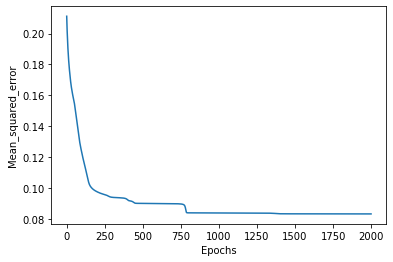

In [685]:
sn = SigmoidNeuron()
sn.fit(x_scaled_train, y_scaled_train, epochs = 2000, learning_rate = 0.015, display_loss = True)

In [686]:
y_pred_train = sn.predict(x_scaled_train)
y_pred_test = sn.predict(x_scaled_test)

In [690]:
y_pred_train

array([[7.04017949e-01],
       [4.52561008e-01],
       [3.73706517e-01],
       [7.73310605e-01],
       [7.50293938e-01],
       [6.09785263e-01],
       [4.49943107e-01],
       [9.99991757e-01],
       [8.16556475e-01],
       [8.30218990e-06],
       [5.39758215e-01],
       [5.97233298e-01],
       [7.06474986e-01],
       [5.23536964e-01],
       [9.99993751e-01],
       [5.44542711e-01],
       [7.23063065e-01],
       [8.18062128e-01],
       [4.89680197e-07],
       [7.90285191e-07],
       [5.52350263e-01],
       [6.00244808e-01],
       [5.24541715e-01],
       [7.87132729e-01],
       [5.49681021e-01],
       [7.45523128e-01],
       [5.84932145e-01],
       [5.42014290e-01],
       [9.99938266e-01],
       [7.71058422e-01],
       [9.99992114e-01],
       [7.30711541e-01],
       [9.99999904e-01],
       [2.13185148e-05],
       [5.89526388e-01],
       [6.74164589e-01],
       [4.62133064e-01],
       [6.39619408e-01],
       [6.30512129e-01],
       [5.99534375e-01],


> We know the accuracy of the model is high, because we know that loss is very low 

# Classification Case (class)

In [653]:
threshold = 4.2

In [654]:
(df['Rating']>= threshold ).astype('int').value_counts()

0    182
1    159
Name: Rating, dtype: int64

> The data should be balanced, according to that we need to change the threshold value

In [655]:
df['Class'] = (df['Rating']>= threshold).astype('int')

In [656]:
df.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating,Class
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,1,0,0,0,1,4.5,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,1,0,0,0,1,4.5,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,1,0,0,0,1,4.4,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,1,0,0,0,0,1,4.3,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,1,0,0,0,1,4.4,1


In [657]:
df.Class.value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [614]:
y_binarised = df['Class'].values

In [615]:
y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

# Split the data 

In [659]:
x = df.drop(['Rating'], axis = 1)
y = df['Rating'].values

In [660]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify = y_binarised, random_state = 12)

In [661]:
print(x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(341, 88) (255, 88) (86, 88) (255,) (86,)


# Scaling the variables

In [662]:
sc = StandardScaler()
x_scaled_train = sc.fit_transform(x_train)
x_scaled_test = sc.transform(x_test)

In [663]:
minmax = MinMaxScaler()
y_scaled_train = minmax.fit_transform(y_train.reshape(-1,1))
y_scaled_test = minmax.transform(y_test.reshape(-1,1))

In [664]:
threshold

4.2

In [665]:
scaled_threshold = minmax.transform(np.array([threshold]).reshape(-1,1))[0][0]  # to get only the number, remove array

In [666]:
scaled_threshold

0.6800000000000002

In [667]:
y_binarised_train = (y_scaled_train >= scaled_threshold).astype('int').ravel()
y_binarised_test = (y_scaled_test >= scaled_threshold).astype('int').ravel()

In [670]:
y_binarised_train

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

# Sigmoid Neuron Class

In [671]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None

    def perceptron(self,x):
        return np.dot(x, self.w.T)+ self.b # transpose

    def sigmoid(self,x):
        return 1.0/(1.0+ np.exp(-x))

    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return(y_pred - y)* y_pred * (1-y_pred) * x    #This is the loss function derived from Squared error loss(y-y^)**2 (derivatives)
                                                       # Gradient descent algorithm ( Loss function)
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y)* y_pred * (1-y_pred)


    def fit(self,x,y, epochs = 1, learning_rate = 1, initialise = True, display_loss=False):
        # initialise w,b 
        if initialise:
            self.w = np.random.randn(1, x.shape[1])
            self.b = 0

        if display_loss:
            loss = {}
            
        for i in tqdm.notebook.tqdm(range(epochs), total = epochs, unit = 'epoch'):   # tqdm is for showing program while we wait to run the code
            dw = 0    
            db = 0
            for x1, y1 in zip(x,y):
                dw +=self.grad_w(x1,y1)
                db += self.grad_b(x1,y1)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db 

            if display_loss:
                y_pred = self.sigmoid(self.perceptron(x))
                loss[i] = mean_squared_error(y_pred,y)

        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean_squared_error')
            plt.show()
    
    def predict(self,x):
        y_pred = []
        for x1 in x:
            y = self.sigmoid(self.perceptron(x1))
            y_pred.append(y)
        return np.array(y_pred)

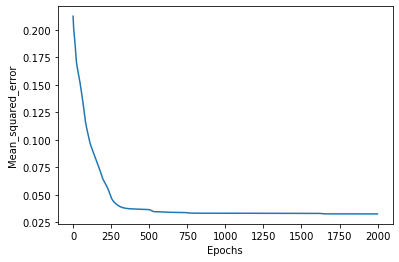

In [673]:
sn = SigmoidNeuron()
sn.fit(x_scaled_train, y_scaled_train, epochs = 2000, learning_rate = 0.015, display_loss = True)

In [674]:
y_pred_train = sn.predict(x_scaled_train)
y_pred_test = sn.predict(x_scaled_test)

In [675]:
y_pred_train

array([[7.18434496e-01],
       [9.99995594e-01],
       [3.75038456e-01],
       [7.92143341e-01],
       [7.78869573e-01],
       [5.95966622e-01],
       [3.74793612e-01],
       [7.19836254e-01],
       [9.95329679e-01],
       [5.68013787e-01],
       [5.64890933e-01],
       [5.95476373e-01],
       [7.22138324e-01],
       [5.28058324e-01],
       [5.84834573e-01],
       [5.18016981e-01],
       [7.15039898e-01],
       [9.96584234e-01],
       [8.04721783e-01],
       [8.84527926e-01],
       [5.64599178e-01],
       [6.06294414e-01],
       [5.25158987e-01],
       [7.90600567e-01],
       [5.31900062e-01],
       [7.53778093e-01],
       [5.95994416e-01],
       [5.44573354e-01],
       [7.44457395e-01],
       [7.86715264e-01],
       [7.53031495e-01],
       [7.21728811e-01],
       [9.15497003e-05],
       [1.12555917e-04],
       [5.41718000e-01],
       [6.58093178e-01],
       [5.01697649e-01],
       [6.37818150e-01],
       [6.22496300e-01],
       [5.93065168e-01],


In [676]:
y_pred_binarised_train = (y_pred_train > scaled_threshold).astype('int').ravel()
y_pred_binarised_test = (y_pred_test > scaled_threshold).astype('int').ravel()

In [677]:
accuracy_train =  metrics.accuracy_score(y_pred_binarised_train, y_binarised_train)
accuracy_test =  metrics.accuracy_score(y_pred_binarised_test, y_binarised_test)

In [678]:
print(accuracy_train, accuracy_test)

0.9490196078431372 0.9186046511627907


> Now we got the good test accuracy